# Imbalanced learn

- https://imbalanced-learn.org/stable/

In [42]:
import imblearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    BorderlineSMOTE,
    SVMSMOTE,
    KMeansSMOTE,
    ADASYN,
)
from collections import Counter

## Data

In [18]:
X, y = make_classification(
    n_samples=5000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.01, 0.05, 0.94],
    class_sep=0.8,
    random_state=0,
)

## Over-sampling
- https://imbalanced-learn.org/stable/over_sampling.html
- https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html

| **Category**           | **Method**            | **Pros**                                                 | **Cons/When Not to Use**                                                       | **Best Use Cases**                       |
|------------------------|-----------------------|----------------------------------------------------------|--------------------------------------------------------------------------------|------------------------------------------|
| **Random Sampling**    | **Random OverSampling** | Simple, effective for quick balancing                    | Overfitting risk due to duplicated samples                                      | Quick fixes, non-complex datasets        |
| **SMOTE-Based**        | **SMOTE**             | Reduces overfitting by generating synthetic examples     | May create ambiguous samples, not ideal for overlapping classes                 | Clear decision boundaries                |
|                        | **Borderline-SMOTE**  | Focuses on decision boundary samples                     | Can produce ambiguous samples; avoid in low-noise datasets                      | Enhancing decision boundary clarity      |
|                        | **SMOTENC**           | Handles mixed data types                                 | Limited to mixed data, not for fully categorical datasets                       | Mixed categorical and numerical features |
|                        | **SMOTEN**            | Works with purely categorical data                       | Less effective with many categorical levels, avoid for numerical data           | Categorical data only                    |
|                        | **SVMSMOTE**          | Potentially more accurate with SVM-based sampling        | Computationally expensive; not ideal for resource-limited situations            | High-accuracy critical tasks             |
|                        | **KMeans SMOTE**      | Enhances sample diversity through clustering             | Complex, requires tuning; not ideal for very large datasets                     | Data with cluster structures             |
| **Adaptive Sampling**  | **ADASYN**            | Targets harder-to-classify samples                       | May generate noisy samples, avoid in noisy datasets                             | Imbalanced and complex datasets          |


### Naive random over-sampling

#### No shrinkage

In [7]:
# Apply RandomOverSampler without shrinkage
ros_no_shrink = RandomOverSampler(random_state=0)
X_resampled_no_shrink, y_resampled_no_shrink = ros_no_shrink.fit_resample(X, y)
from collections import Counter

print(
    f"Random Oversampler, no shrinkage: {sorted(Counter(y_resampled_no_shrink).items())}"
)

Random Oversampler, no shrinkage: [(0, 4674), (1, 4674), (2, 4674)]
Random Oversampler, shrinkage=0.9: [(0, 4674), (1, 4674), (2, 4674)]


#### With Shrinkage

In [ ]:
# Apply RandomOverSampler with shrinkage
ros_shrink = RandomOverSampler(random_state=0, shrinkage=0.9)
X_resampled_shrink, y_resampled_shrink = ros_shrink.fit_resample(X, y)
print(
    f"Random Oversampler, shrinkage=0.9: {sorted(Counter(y_resampled_shrink).items())}"
)

#### Plots

In [24]:
# Fit logistic regression model without resampling
clf_no_resampling = LogisticRegression()
clf_no_resampling.fit(X, y)

# Fit logistic regression model with resampling
clf_resampling = LogisticRegression()
clf_resampling.fit(X_resampled_no_shrink, y_resampled_no_shrink)

# Fit logistic regression model with resampled_shrink bootstrap (shrinkage)
clf_resampled_shrink = LogisticRegression()
clf_resampled_shrink.fit(X_resampled_shrink, y_resampled_shrink)

LogisticRegression()

In [25]:
# Create mesh for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary without resampling
Z_no_resampling = clf_no_resampling.predict(np.c_[xx.ravel(), yy.ravel()])
Z_no_resampling = Z_no_resampling.reshape(xx.shape)

In [26]:
# Create mesh for resampled data
x_min_resampled_no_shrink, x_max_resampled_no_shrink = (
    X_resampled_no_shrink[:, 0].min() - 1,
    X_resampled_no_shrink[:, 0].max() + 1,
)
y_min_resampled_no_shrink, y_max_resampled_no_shrink = (
    X_resampled_no_shrink[:, 1].min() - 1,
    X_resampled_no_shrink[:, 1].max() + 1,
)
xx_resampled_no_shrink, yy_resampled_no_shrink = np.meshgrid(
    np.arange(x_min_resampled_no_shrink, x_max_resampled_no_shrink, h),
    np.arange(y_min_resampled_no_shrink, y_max_resampled_no_shrink, h),
)

# Plot decision boundary with resampling
Z_resampled_no_shrink = clf_resampling.predict(
    np.c_[xx_resampled_no_shrink.ravel(), yy_resampled_no_shrink.ravel()]
)
Z_resampled_no_shrink = Z_resampled_no_shrink.reshape(
    xx_resampled_no_shrink.shape
)

In [27]:
# Create mesh for resampled data with shrinkage
x_min_resampled_shrink, x_max_resampled_shrink = (
    X_resampled_shrink[:, 0].min() - 1,
    X_resampled_shrink[:, 0].max() + 1,
)
y_min_resampled_shrink, y_max_resampled_shrink = (
    X_resampled_shrink[:, 1].min() - 1,
    X_resampled_shrink[:, 1].max() + 1,
)
xx_resampled_shrink, yy_resampled_shrink = np.meshgrid(
    np.arange(x_min_resampled_shrink, x_max_resampled_shrink, h),
    np.arange(y_min_resampled_shrink, y_max_resampled_shrink, h),
)

# Plot decision boundary for resampled data with shrinkage
Z_resampled_shrink = clf_resampled_shrink.predict(
    np.c_[xx_resampled_shrink.ravel(), yy_resampled_shrink.ravel()]
)
Z_resampled_shrink = Z_resampled_shrink.reshape(xx_resampled_shrink.shape)

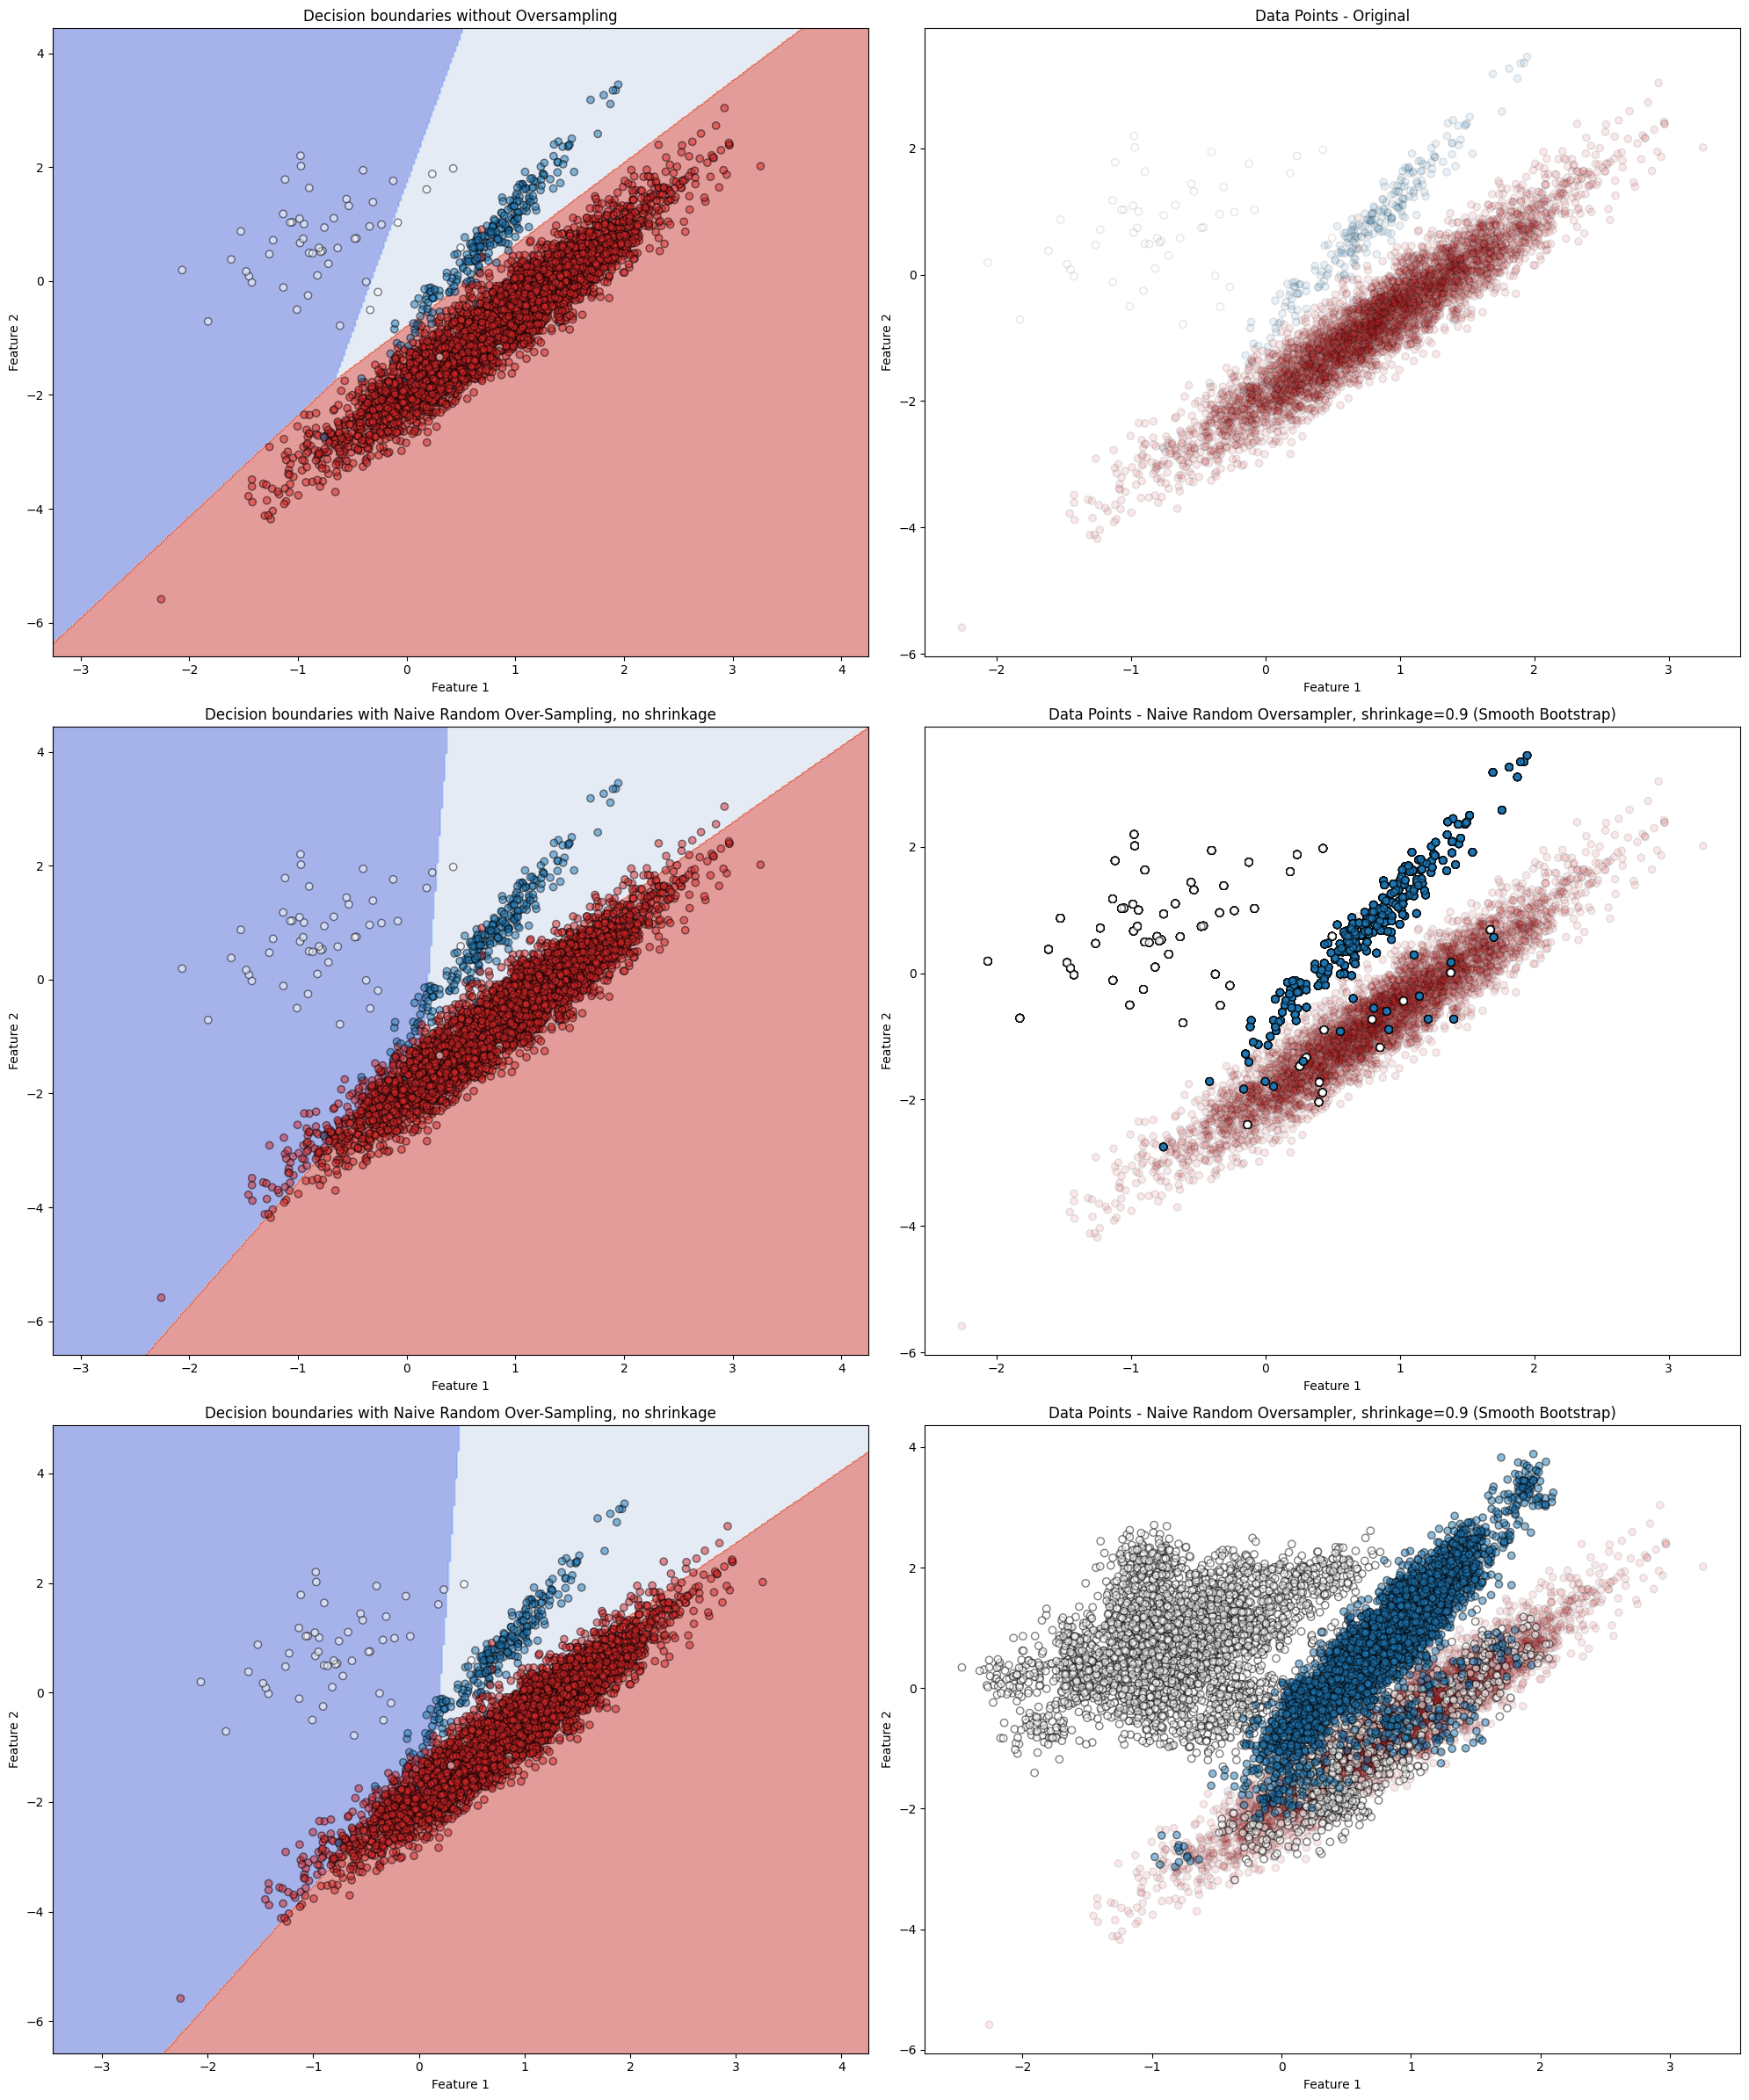

In [70]:
# Color mapping to ensure consistency
colors = np.array(["#FFFFFF", "#1f77b4", "#d62728"])  # White, blue, red

plt.figure(figsize=(20, 24))

# ==================================================================================================

# Plot decision boundary without resampling
plt.subplot(3, 2, 1)
plt.contourf(xx, yy, Z_no_resampling, alpha=0.5, cmap="coolwarm")
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries without Oversampling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot original data points
plt.subplot(3, 2, 2)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.title("Data Points - Original")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# ==================================================================================================

# Plot decision boundary with resampling
plt.subplot(3, 2, 3)
plt.contourf(
    xx_resampled_no_shrink,
    yy_resampled_no_shrink,
    Z_resampled_no_shrink,
    alpha=0.5,
    cmap="coolwarm",
)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries with Naive Random Over-Sampling, no shrinkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot oversampled data points
plt.subplot(3, 2, 4)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.scatter(
    X_resampled_no_shrink[len(X) :, 0],
    X_resampled_no_shrink[len(X) :, 1],
    c=colors[y_resampled_no_shrink[len(X) :]],
    edgecolor="k",
    marker="o",
    alpha=0.5,
)
plt.title(
    "Data Points - Naive Random Oversampler, shrinkage=0.9 (Smooth Bootstrap)"
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# ==================================================================================================

# Plot decision boundary with resampled_shrink bootstrap
plt.subplot(3, 2, 5)
plt.contourf(
    xx_resampled_shrink,
    yy_resampled_shrink,
    Z_resampled_shrink,
    alpha=0.5,
    cmap="coolwarm",
)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries with Naive Random Over-Sampling, no shrinkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot smooth bootstrap data points
plt.subplot(3, 2, 6)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.scatter(
    X_resampled_shrink[len(X) :, 0],
    X_resampled_shrink[len(X) :, 1],
    c=colors[y_resampled_shrink[len(X) :]],
    edgecolor="k",
    marker="o",
    alpha=0.5,
)
plt.title(
    "Data Points - Naive Random Oversampler, shrinkage=0.9 (Smooth Bootstrap)"
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# ==================================================================================================

plt.tight_layout()
plt.show()

String data are also welcomed

In [16]:
X_hetero = np.array(
    [["xxx", 1, 1.0], ["yyy", 2, 2.0], ["zzz", 3, 3.0]], dtype=object
)
y_hetero = np.array([0, 0, 1])
X_resampled, y_resampled = ros.fit_resample(X_hetero, y_hetero)
print(X_resampled)
print(y_resampled)

[['xxx' 1 1.0]
 ['yyy' 2 2.0]
 ['zzz' 3 3.0]
 ['zzz' 3 3.0]]
[0 0 1 1]


Pandas too, everyone likes pandas

In [17]:
# from sklearn.datasets import fetch_openml

# df_adult, y_adult = fetch_openml(
#     "adult", version=2, as_frame=True, return_X_y=True
# )
# df_adult.head()
# df_resampled, y_resampled = ros.fit_resample(df_adult, y_adult)
# df_resampled.head()

### SMOTE

#### SMOTE

In [35]:
# Apply SMOTE Oversampler
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)
from collections import Counter

print(f"SMOTE Oversampler: {sorted(Counter(y_smote).items())}")

SMOTE Oversampler: [(0, 4674), (1, 4674), (2, 4674)]


#### Borderline-SMOTE

In [57]:
# Apply Borderline SMOTE Oversampler
borderlinesmote = BorderlineSMOTE(random_state=0)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_resample(X, y)
from collections import Counter

print(
    f"Borderline SMOTE Oversampler: {sorted(Counter(y_borderlinesmote).items())}"
)

Borderline SMOTE Oversampler: [(0, 4674), (1, 4674), (2, 4674)]


#### SVMSMOTE

In [58]:
# Apply SVM SMOTE Oversampler
svmsmote = SVMSMOTE(random_state=0)
X_svmsmote, y_svmsmote = svmsmote.fit_resample(X, y)
from collections import Counter

print(f"SVM SMOTE Oversampler: {sorted(Counter(y_svmsmote).items())}")

SVM SMOTE Oversampler: [(0, 4674), (1, 4674), (2, 4674)]


#### KMeans SMOTE

In [59]:
# Apply KMeans SMOTE Oversampler
kmeanssmote = KMeansSMOTE(random_state=0, cluster_balance_threshold=0.05)
X_kmeanssmote, y_kmeanssmote = kmeanssmote.fit_resample(X, y)
from collections import Counter

print(f"KMeans SMOTE Oversampler: {sorted(Counter(y_kmeanssmote).items())}")

KMeans SMOTE Oversampler: [(0, 4674), (1, 4675), (2, 4674)]


#### Plots

In [60]:
# Fit logistic regression models for each SMOTE variant
clf_smote = LogisticRegression()
clf_smote.fit(X_smote, y_smote)

clf_borderlinesmote = LogisticRegression()
clf_borderlinesmote.fit(X_borderlinesmote, y_borderlinesmote)

clf_svmsmote = LogisticRegression()
clf_svmsmote.fit(X_svmsmote, y_svmsmote)

clf_kmeanssmote = LogisticRegression()
clf_kmeanssmote.fit(X_kmeanssmote, y_kmeanssmote)

LogisticRegression()

In [65]:
# Create mesh for each SMOTE variant
h = 0.02  # step size in the mesh


def create_mesh(X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


xx_no_resampling, yy_no_resampling = create_mesh(X)
xx_smote, yy_smote = create_mesh(X_smote)
xx_borderlinesmote, yy_borderlinesmote = create_mesh(X_borderlinesmote)
xx_svmsmote, yy_svmsmote = create_mesh(X_svmsmote)
xx_kmeanssmote, yy_kmeanssmote = create_mesh(X_kmeanssmote)

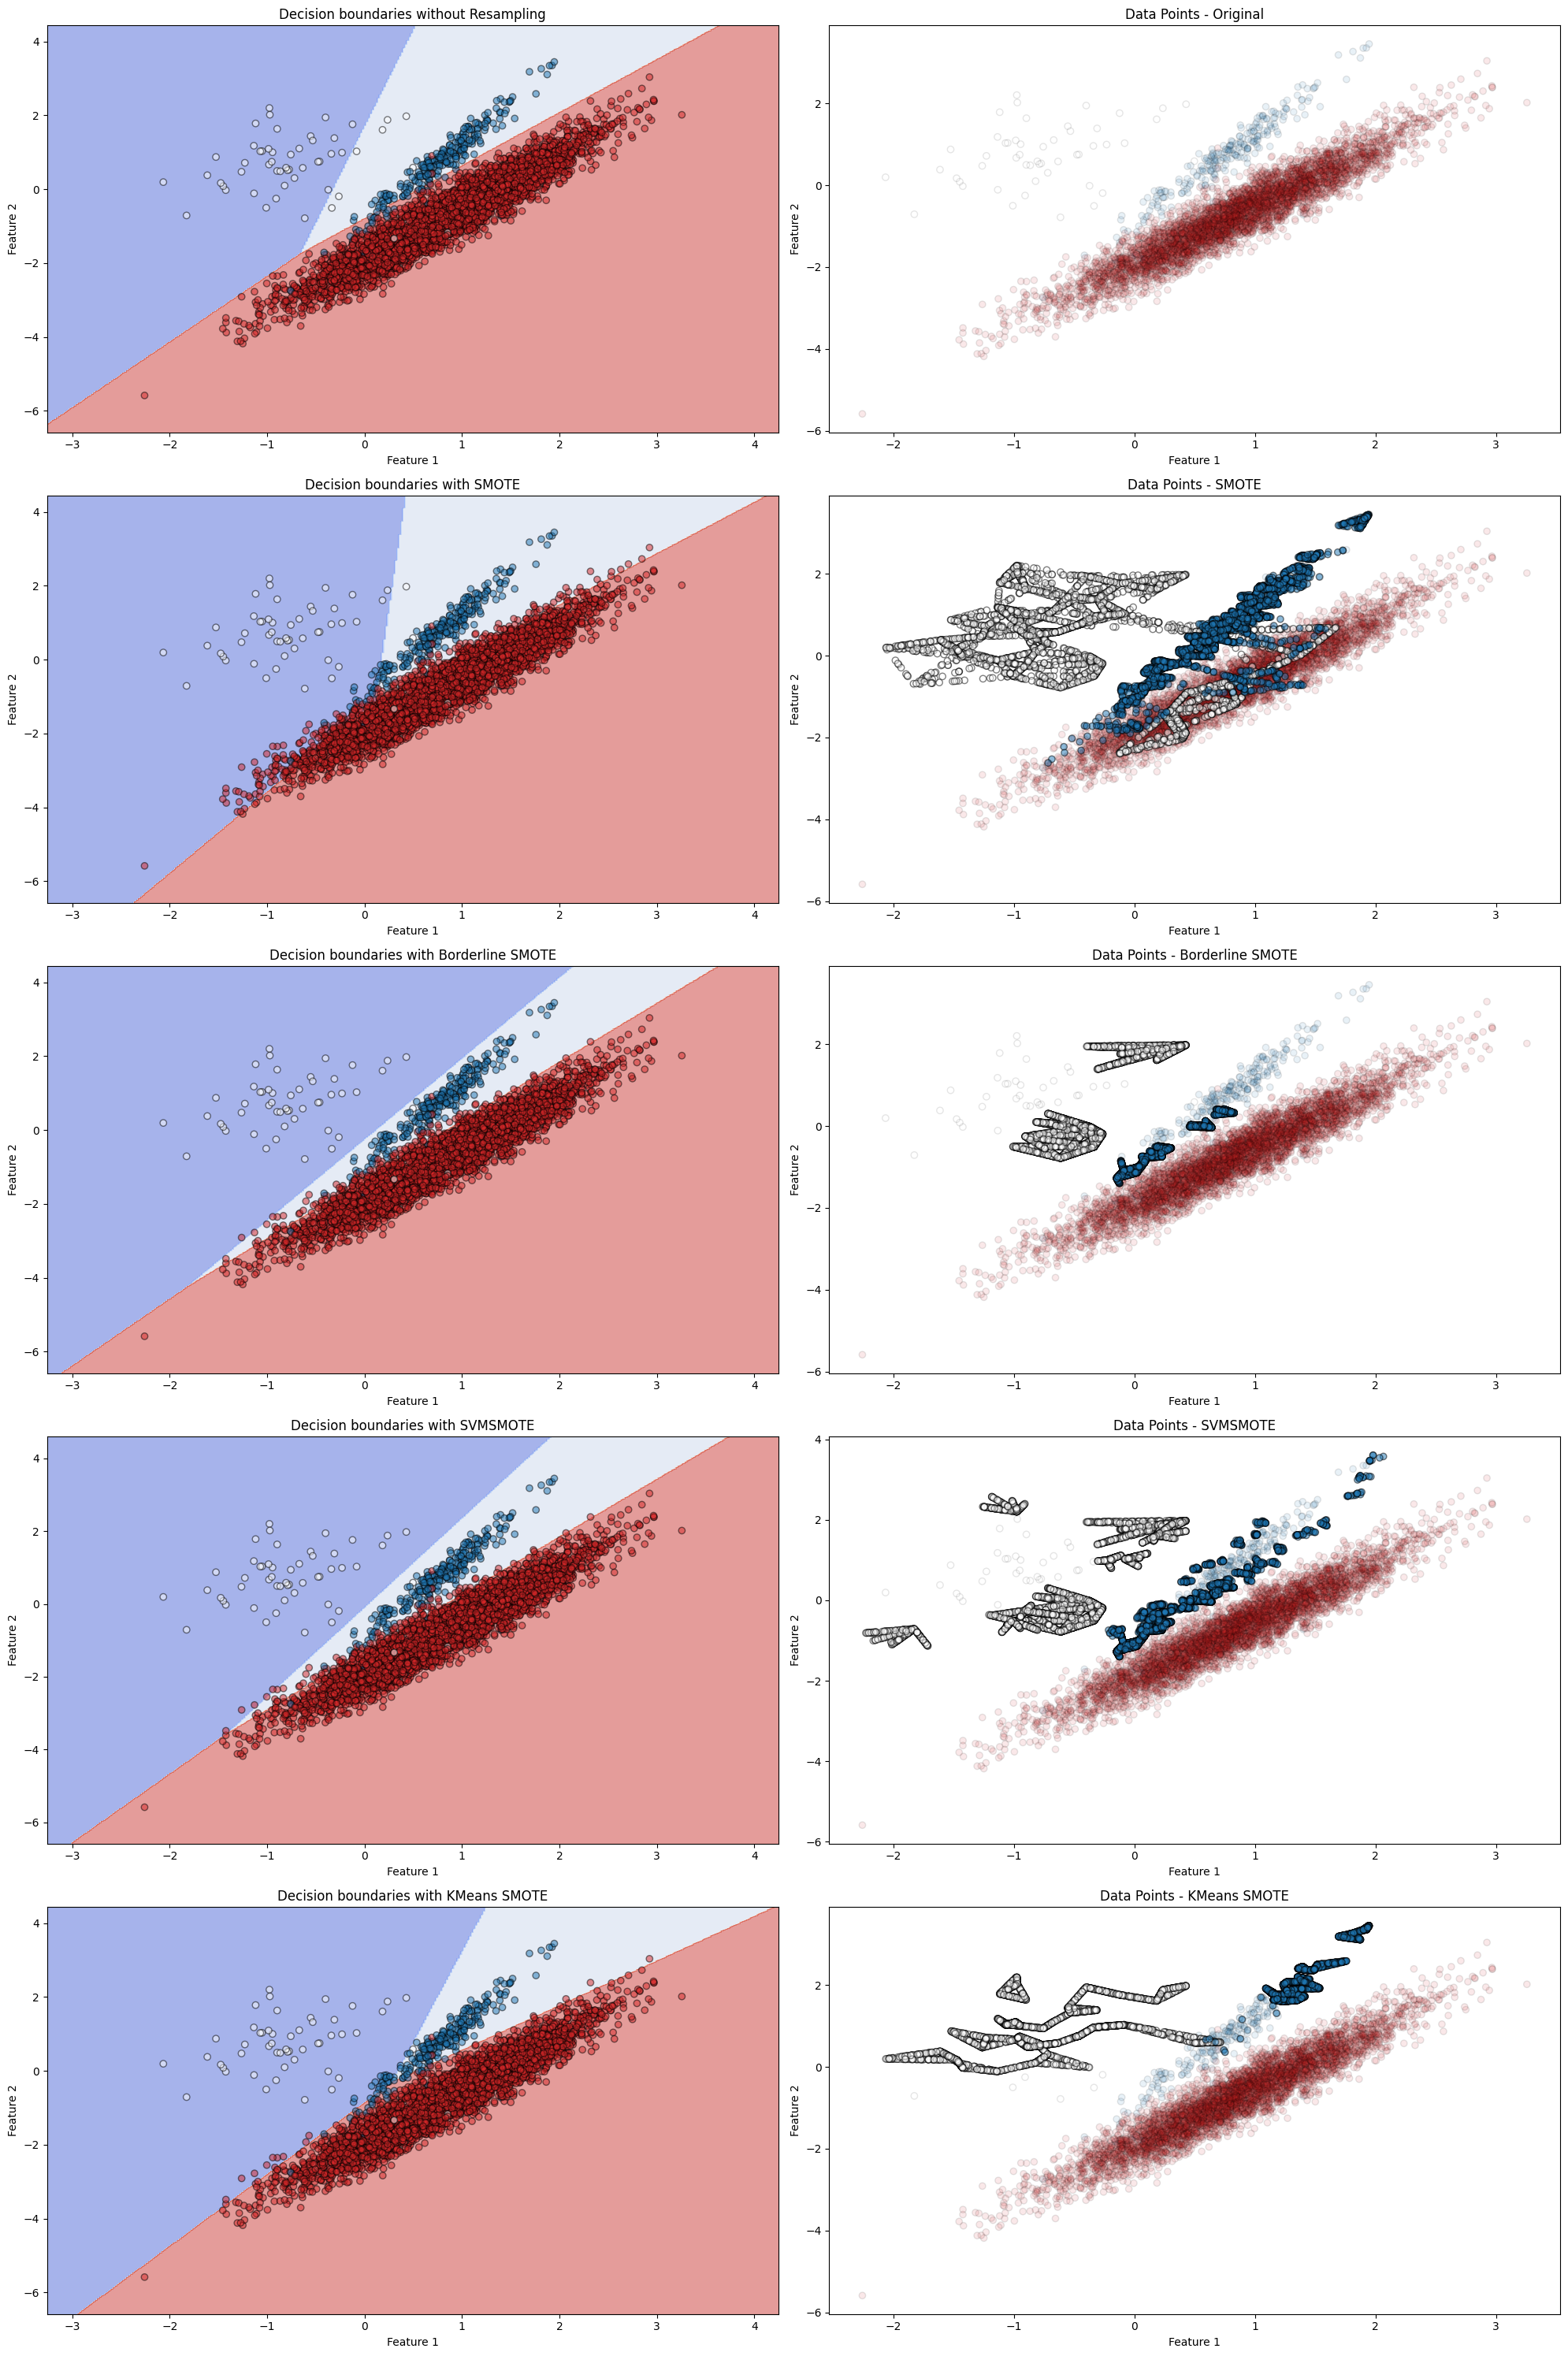

In [69]:
# Plot decision boundaries for each case
Z_no_resampling = clf_no_resampling.predict(
    np.c_[xx_no_resampling.ravel(), yy_no_resampling.ravel()]
)
Z_no_resampling = Z_no_resampling.reshape(xx_no_resampling.shape)

Z_smote = clf_smote.predict(np.c_[xx_smote.ravel(), yy_smote.ravel()])
Z_smote = Z_smote.reshape(xx_smote.shape)

Z_borderlinesmote = clf_borderlinesmote.predict(
    np.c_[xx_borderlinesmote.ravel(), yy_borderlinesmote.ravel()]
)
Z_borderlinesmote = Z_borderlinesmote.reshape(xx_borderlinesmote.shape)

Z_svmsmote = clf_svmsmote.predict(
    np.c_[xx_svmsmote.ravel(), yy_svmsmote.ravel()]
)
Z_svmsmote = Z_svmsmote.reshape(xx_svmsmote.shape)

Z_kmeanssmote = clf_kmeanssmote.predict(
    np.c_[xx_kmeanssmote.ravel(), yy_kmeanssmote.ravel()]
)
Z_kmeanssmote = Z_kmeanssmote.reshape(xx_kmeanssmote.shape)

# Plotting
plt.figure(figsize=(20, 30))

# Plot no resampling
plt.subplot(5, 2, 1)
plt.contourf(
    xx_no_resampling,
    yy_no_resampling,
    Z_no_resampling,
    alpha=0.5,
    cmap="coolwarm",
)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries without Resampling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(5, 2, 2)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.title("Data Points - Original")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot SMOTE
plt.subplot(5, 2, 3)
plt.contourf(xx_smote, yy_smote, Z_smote, alpha=0.5, cmap="coolwarm")
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries with SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(5, 2, 4)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.scatter(
    X_smote[len(X) :, 0],
    X_smote[len(X) :, 1],
    c=colors[y_smote[len(X) :]],
    edgecolor="k",
    marker="o",
    alpha=0.5,
)
plt.title("Data Points - SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot Borderline SMOTE
plt.subplot(5, 2, 5)
plt.contourf(
    xx_borderlinesmote,
    yy_borderlinesmote,
    Z_borderlinesmote,
    alpha=0.5,
    cmap="coolwarm",
)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries with Borderline SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(5, 2, 6)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.scatter(
    X_borderlinesmote[len(X) :, 0],
    X_borderlinesmote[len(X) :, 1],
    c=colors[y_borderlinesmote[len(X) :]],
    edgecolor="k",
    marker="o",
    alpha=0.5,
)
plt.title("Data Points - Borderline SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot SVMSMOTE
plt.subplot(5, 2, 7)
plt.contourf(xx_svmsmote, yy_svmsmote, Z_svmsmote, alpha=0.5, cmap="coolwarm")
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries with SVMSMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(5, 2, 8)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.scatter(
    X_svmsmote[len(X) :, 0],
    X_svmsmote[len(X) :, 1],
    c=colors[y_svmsmote[len(X) :]],
    edgecolor="k",
    marker="o",
    alpha=0.5,
)
plt.title("Data Points - SVMSMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot KMeans SMOTE
plt.subplot(5, 2, 9)
plt.contourf(
    xx_kmeanssmote, yy_kmeanssmote, Z_kmeanssmote, alpha=0.5, cmap="coolwarm"
)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries with KMeans SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(5, 2, 10)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.scatter(
    X_kmeanssmote[len(X) :, 0],
    X_kmeanssmote[len(X) :, 1],
    c=colors[y_kmeanssmote[len(X) :]],
    edgecolor="k",
    marker="o",
    alpha=0.5,
)
plt.title("Data Points - KMeans SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

### ADASYN

In [63]:
# Apply ADASYN Oversampler
adasyn = ADASYN(random_state=0)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
from collections import Counter

print(f"ADASYN Oversampler: {sorted(Counter(y_adasyn).items())}")

ADASYN Oversampler: [(0, 4673), (1, 4662), (2, 4674)]


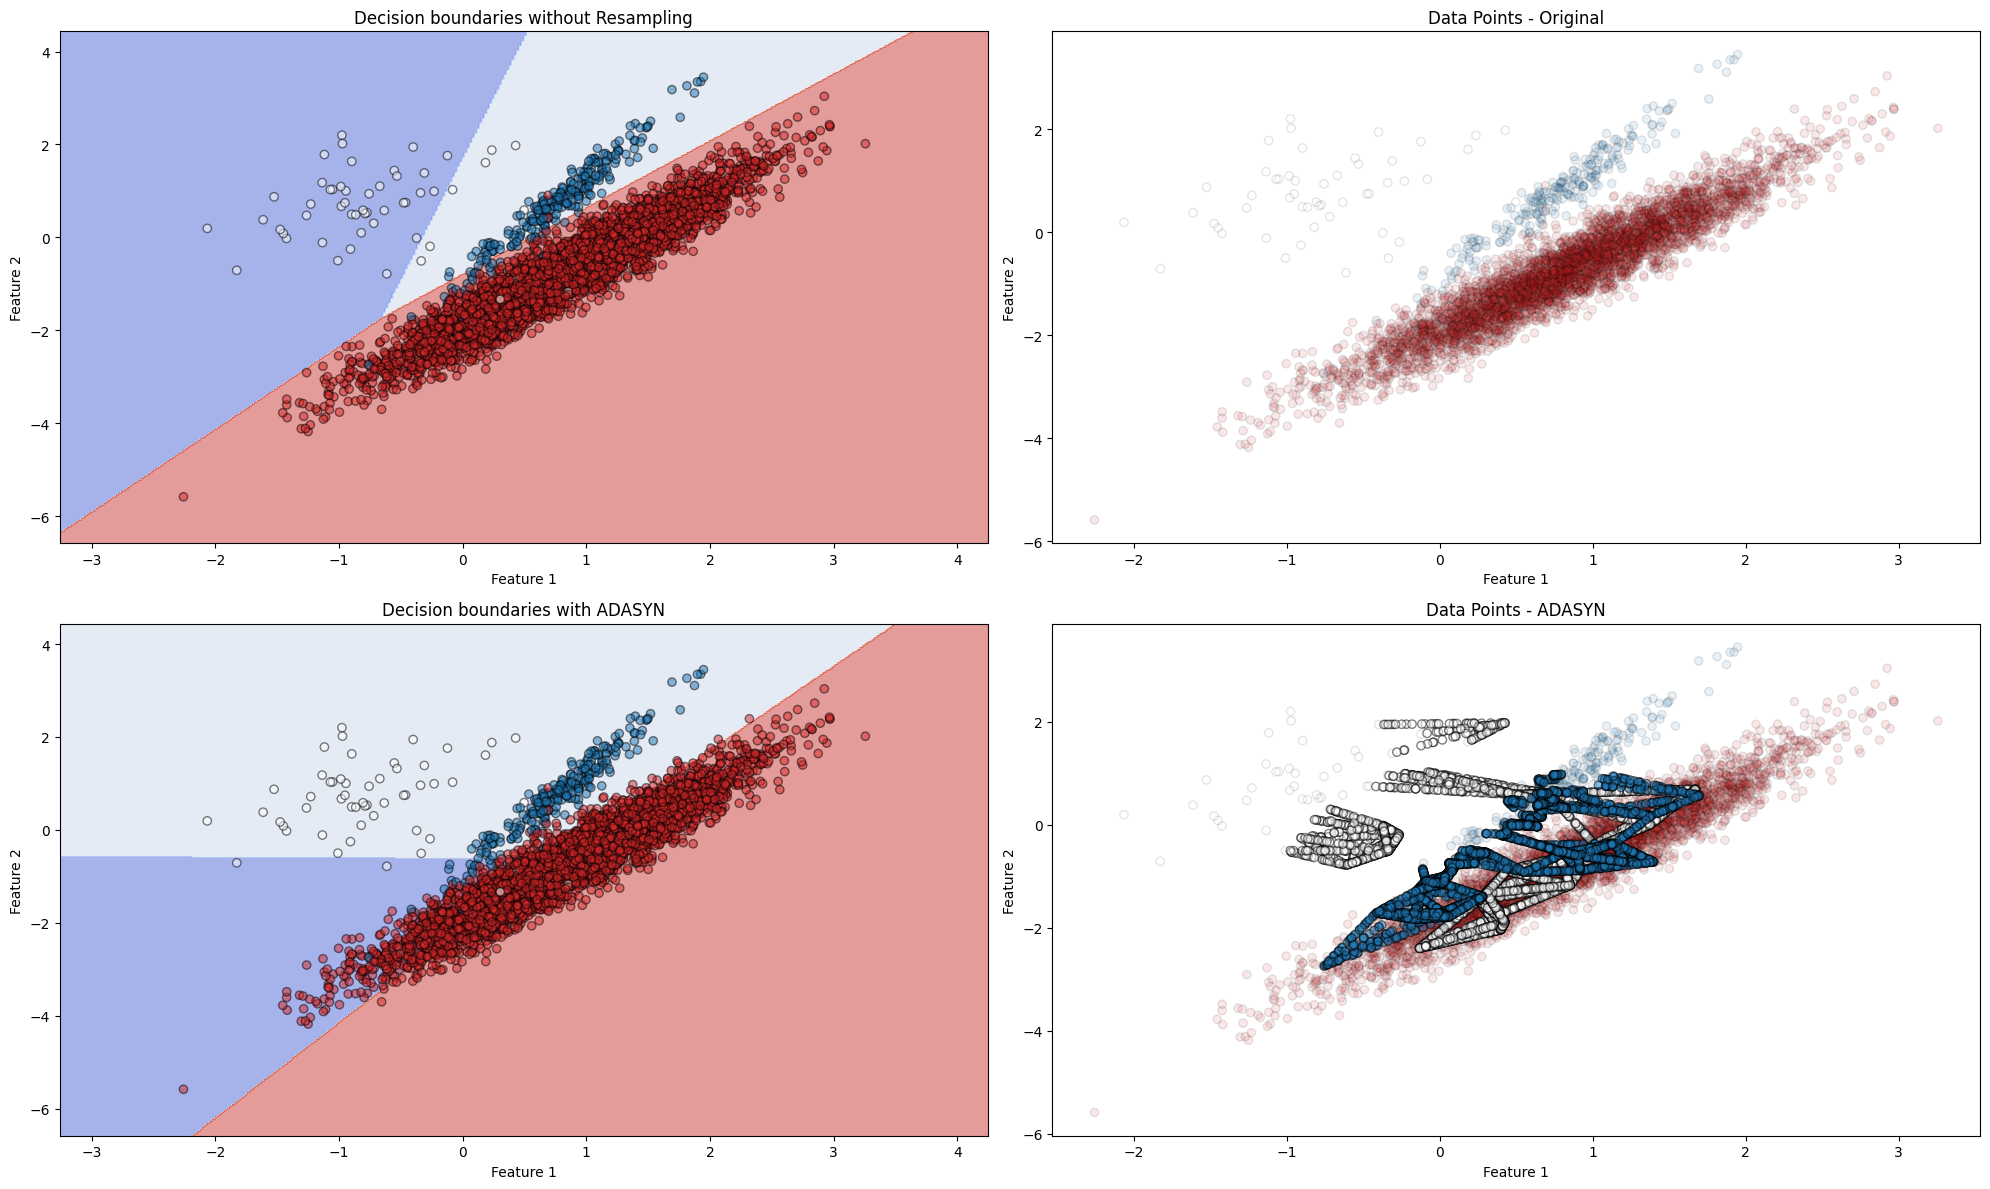

In [80]:
# Fit logistic regression models for no resampling and ADASYN
clf_no_resampling = LogisticRegression()
clf_no_resampling.fit(X, y)

clf_adasyn = LogisticRegression()
clf_adasyn.fit(X_adasyn, y_adasyn)

# Create mesh for no resampling and ADASYN
h = 0.02  # step size in the mesh


def create_mesh(X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


xx_no_resampling, yy_no_resampling = create_mesh(X)
xx_adasyn, yy_adasyn = create_mesh(X_adasyn)

# Plot decision boundaries for no resampling and ADASYN
Z_no_resampling = clf_no_resampling.predict(
    np.c_[xx_no_resampling.ravel(), yy_no_resampling.ravel()]
)
Z_no_resampling = Z_no_resampling.reshape(xx_no_resampling.shape)

Z_adasyn = clf_adasyn.predict(np.c_[xx_adasyn.ravel(), yy_adasyn.ravel()])
Z_adasyn = Z_adasyn.reshape(xx_adasyn.shape)

# Plotting
plt.figure(figsize=(20, 12))

# Plot no resampling
plt.subplot(2, 2, 1)
plt.contourf(
    xx_no_resampling,
    yy_no_resampling,
    Z_no_resampling,
    alpha=0.5,
    cmap="coolwarm",
)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries without Resampling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(2, 2, 2)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.title("Data Points - Original")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot ADASYN
plt.subplot(2, 2, 3)
plt.contourf(xx_adasyn, yy_adasyn, Z_adasyn, alpha=0.5, cmap="coolwarm")
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.5
)
plt.title("Decision boundaries with ADASYN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(2, 2, 4)
plt.scatter(
    X[:, 0], X[:, 1], c=colors[y], edgecolor="k", marker="o", alpha=0.1
)
plt.scatter(
    X_adasyn[len(X) :, 0],
    X_adasyn[len(X) :, 1],
    c=colors[y_adasyn[len(X) :]],
    edgecolor="k",
    marker="o",
    alpha=0.5,
)
plt.title("Data Points - ADASYN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

😲

### Compare

In [83]:
from sklearn.metrics import accuracy_score

# Fit logistic regression models for each resampling method
clf_no_resampling = LogisticRegression().fit(X, y)
clf_random = LogisticRegression().fit(
    X_resampled_no_shrink, y_resampled_no_shrink
)
clf_random_shrink = LogisticRegression().fit(
    X_resampled_shrink, y_resampled_shrink
)
clf_smote = LogisticRegression().fit(X_smote, y_smote)
clf_borderlinesmote = LogisticRegression().fit(
    X_borderlinesmote, y_borderlinesmote
)
clf_svmsmote = LogisticRegression().fit(X_svmsmote, y_svmsmote)
clf_kmeanssmote = LogisticRegression().fit(X_kmeanssmote, y_kmeanssmote)
clf_adasyn = LogisticRegression().fit(X_adasyn, y_adasyn)

# Make predictions
y_pred_no_resampling = clf_no_resampling.predict(X)
y_pred_random = clf_random.predict(X)
y_pred_random_shrink = clf_random_shrink.predict(X)
y_pred_smote = clf_smote.predict(X)
y_pred_borderlinesmote = clf_borderlinesmote.predict(X)
y_pred_svmsmote = clf_svmsmote.predict(X)
y_pred_kmeanssmote = clf_kmeanssmote.predict(X)
y_pred_adasyn = clf_adasyn.predict(X)

# Calculate accuracy for each model
accuracy_no_resampling = accuracy_score(y, y_pred_no_resampling)
accuracy_random = accuracy_score(y, y_pred_random)
accuracy_random_shrink = accuracy_score(y, y_pred_random_shrink)
accuracy_smote = accuracy_score(y, y_pred_smote)
accuracy_borderlinesmote = accuracy_score(y, y_pred_borderlinesmote)
accuracy_svmsmote = accuracy_score(y, y_pred_svmsmote)
accuracy_kmeanssmote = accuracy_score(y, y_pred_kmeanssmote)
accuracy_adasyn = accuracy_score(y, y_pred_adasyn)

# Print accuracy results
accuracy_results = (
    f"\n→ {'Accuracy without resampling ':-<60} {accuracy_no_resampling:.2f}"
    f"\n→ {'Accuracy with Random Oversampling ':-<60} {accuracy_random:.2f}"
    f"\n→ {'Accuracy with Random Oversampling (Shrinkage) ':-<60} {accuracy_random_shrink:.2f}"
    f"\n→ {'Accuracy with SMOTE ':-<60} {accuracy_smote:.2f}"
    f"\n→ {'Accuracy with Borderline SMOTE ':-<60} {accuracy_borderlinesmote:.2f}"
    f"\n→ {'Accuracy with SVM SMOTE ':-<60} {accuracy_svmsmote:.2f}"
    f"\n→ {'Accuracy with KMeans SMOTE ':-<60} {accuracy_kmeanssmote:.2f}"
    f"\n→ {'Accuracy with ADASYN ':-<60} {accuracy_adasyn:.2f}"
)

print(accuracy_results)


→ Accuracy without resampling -------------------------------- 0.99
→ Accuracy with Random Oversampling -------------------------- 0.92
→ Accuracy with Random Oversampling (Shrinkage) -------------- 0.92
→ Accuracy with SMOTE ---------------------------------------- 0.92
→ Accuracy with Borderline SMOTE ----------------------------- 0.97
→ Accuracy with SVM SMOTE ------------------------------------ 0.97
→ Accuracy with KMeans SMOTE --------------------------------- 0.98
→ Accuracy with ADASYN --------------------------------------- 0.72


Should be done on test dataset

## Under-sampling

- https://imbalanced-learn.org/stable/under_sampling.html
- https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html

Algorithms:
- Random undersampling
- Prototype generation methods
- Prototype selection methods
  - Controlled undersampling
  - Cleaning methods